Para obtener un mejor resultado en la integración es mejor usar la aproximación de segundo orden y con varias variables. como vimos en clase:
$$
\vec y_{n+1} = \vec y_n +h\vec f+ \frac{1}{2}h² \left(
\frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f
\right)
$$
donde $f$ es $f(x_n, \vec y_n)$, $\mathbb{J}$ es el Jacobiano evaluado en este punto. $(x_n, \vec y_n)$ y el orden del error es de $O(h²)$

In [3]:
from pylab import *
%matplotlib inline

def integra2(f,jac,p_ini,x,h=0.1): 
    jn1=yn + (h*f) + ((0.5)*h*h(jac[0] + dot(jac[1],f)))
    

1. para programar, debemos poner las condiciones iniciales y saber como se usa el array en pylab
matrix no es una matriz, es un arreglo bidimensional y no funciona igual, es mas bien visto como un conjunto de arreglos.

In [4]:
a=array([2,6])
b=[2,6]
print a,b
print 2*a, 2*b

[2 6] [2, 6]
[ 4 12] [2, 6, 2, 6]


In [5]:
A= array([[1,0],[0,1]]) #un vector visto com arreglo
B= matrix([[1,0],[0,1]])#una matriz vista como una matriz
print A , A[0,1]

print B

print A*b

print dot(B,b)   #matriz-arreglo no funciona
print len(dot(B,b))

[[1 0]
 [0 1]] 0
[[1 0]
 [0 1]]
[[2 0]
 [0 6]]
[[2 6]]
1


In [6]:
A= array([[1,2],[3,4]]) #matriz vista como arreglo
a= array([6,7]) #vector visto como arreglo
print A[0,0],A[0,1],A[1,0],A[1,1]
print A*a
print dot(A,a) #si se puede

1 2 3 4
[[ 6 14]
 [18 28]]
[20 46]


In [7]:
x=zeros((2,6))
print x
x[1,1]=3
x[0,1]=9
print x
print x[:,1]
print x[1,:]*8
print type(x[1,:])

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  9.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.]]
[ 9.  3.]
[  0.  24.   0.   0.   0.   0.]
<type 'numpy.ndarray'>


$31$ de Agosto\

ahora si, definamos la función


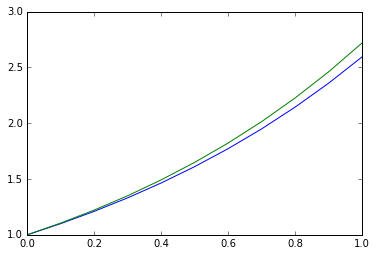

In [8]:
def integral2(ec,d_ec,p_ini,x,h=0.1):
    #f=ec(p_ini)
    #df=d_ec(p_ini)[0]
    #Jac=d_ec(p_ini)[0]
    tiempos=arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f
    #jn1=yn+(h*f)+(0.5*h*h*(Jac[0]+dot(Jac[1],f)))
    return tiempos,sol

def prueba(y,t):
    return array(y)

t,y=integral2(prueba,0,[1],[0,1])
plot(t,y,t,exp(t))
    
    

[[  1.           0.        ]
 [  1.          -0.1       ]
 [  0.99        -0.2       ]
 ..., 
 [  9.6225874    7.0232463 ]
 [ 10.32491203   6.06098756]
 [ 10.93101079   5.02849635]]


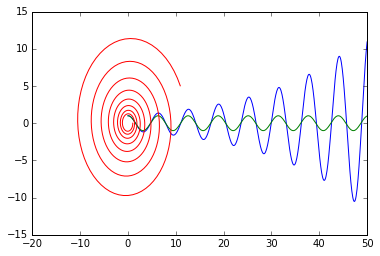

In [9]:
def integral2(ec,d_ec,p_ini,x,h=0.1):
    #f=ec(p_ini)
    #df=d_ec(p_ini)[0]
    #Jac=d_ec(p_ini)[0]
    tiempos=arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f
    #jn1=yn+(h*f)+(0.5*h*h*(Jac[0]+dot(Jac[1],f)))
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

t,y=integral2(prueba,0,[1,0],[0,50],0.1)
print y
plot(t,y[:,0],t,cos(t))
plot(y[:,0],y[:,1])

In [10]:
def integral2(ec,d_ec,p_ini,x,h=0.1):
   
    tiempos=arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
   
        f=ec(sol[i,:],tiempos[i])
        df,Jac =d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(Jac,f)))

    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integral2(prueba,d_prueba,[1,0],[0,50],0.1)




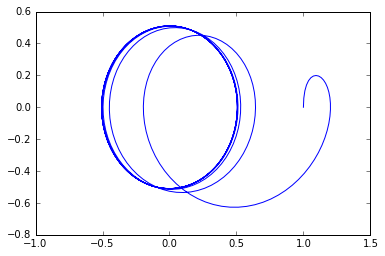

In [11]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])
  
def dp(y,t):
    return array([0,cos(t)]), array([[0,1],[-0.5*cos(y[0]),-2]])

t,y=integral2(p,dp,[1,0],[0,50],0.1)
plot(y[:,0],y[:,1])


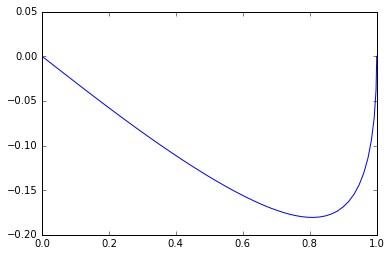

In [12]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])])
  
def dp(y,t):
    return array([0,0]), array([[0,1],[-0.5*cos(y[0]),-2]])

t,y=integral2(p,dp,[1,0],[0,50],0.1)
plot(y[:,0],y[:,1])

In [13]:
def rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

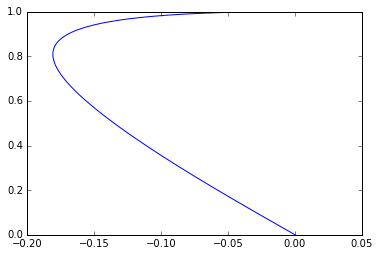

In [14]:
t,y = rk2(p,[1,0],[0,50],0.01)
plot(y[:,1],y[:,0])  
